## Data Description

Here's a detailed explanation of each column :


1. **Company Name:** The official name of the company. E.g Zoom

2. **Short Description:** A brief overview of what the company does, typically in one or two sentences.
  
3. **Current Stage:** The present development phase of the company, such as Pre-Seed/Seed 'Early', Growth, IPO and Acquired.
- Pre-Seed/Seed: Idea validation and early development.
- Early: Product refinement and market entry.
- Growth: Rapid expansion and scaling operations.
- IPO: Transition to a public company and access to broader capital.
- Acquired: Integration with or purchase by another entity, providing an exit strategy.


4. **Partners:** Key investors or strategic partners at Sequoia Capital who have invested in or collaborated with the company

5. **Full Description:** A slightly detailed description of the company’s products, services, market position, and other relevant details.

6. **Logo Link:** The URL link to the company’s official logo.

7. **Website Link:** The URL link to the company’s official website.

8. **Twitter Link:** The URL link to the company’s official Twitter profile.

9. **LinkedIn Link:** The URL link to the company’s official LinkedIn profile.

10. **Instagram Link:** The URL link to the company’s official Instagram profile.

11. **YouTube Link:** The URL link to the company’s official YouTube channel.

12. **Job Titles:** List of job titles or roles available at the company.

13. **Team Members:** Key individuals working at the company, typically including founders, executives, and notable employees.

14. **Founded Year:** The year the company was established.

15. **Partnered Year:** The year Sequoia Capital invested in the company, typically forming a significant partnership to support the company’s growth.

16. **IPO Year:** The year the company went public through an Initial Public Offering.  _nitial public offering, shares of a private company are made available to the public for the first time. An IPO allows a company to raise equity capital from public investors

17. **Acquired Year:** The year the company was acquired by another entity, if applicable.

18. **Categories:** AI/ML,Climate Tech,Consumer,Crypto,Enterprise,FinTech,Healthcare

    
| **Category**     | **Focus**                          | **Key Areas**                                                      | **Applications**                                            |
|------------------|------------------------------------|-------------------------------------------------------------------|-------------------------------------------------------------|
| **AI/ML**        | Intelligent automation             | NLP, computer vision, predictive analytics                        | Healthcare, finance, retail                                 |
| **Climate Tech** | Environmental sustainability       | Renewable energy, energy storage, carbon capture                  | Energy, transportation, waste management                    |
| **Consumer**     | Direct-to-consumer products        | E-commerce, consumer electronics, food & beverage                 | Retail, entertainment, lifestyle                            |
| **Crypto**       | Digital currencies and blockchain  | Cryptocurrencies, blockchain, DeFi                                | Finance, smart contracts, supply chain                      |
| **Enterprise**   | Business solutions                 | Enterprise software, cloud computing, cybersecurity               | Business operations, data management, IT services           |
| **FinTech**      | Financial technology               | Digital payments, lending, wealth management                      | Banking, insurance, investments                             |
| **Healthcare**   | Medical and health innovations     | Medical devices, digital health, biotech                          | Diagnostics, treatment, healthcare management               |


19. **Job Link:** The URL link to the company’s careers or job opportunities page.


In [ ]:
import ast
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

sns.set_theme(style="whitegrid")

try:
    df =pd.read_csv('/content/drive/MyDrive/mldata/mylane/data.csv')
except FileExistsError:
    df =pd.read_csv('data.csv')

df.head()

: 

## Data cleaning

In [2]:
# view information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_name       341 non-null    object 
 1   short_description  341 non-null    object 
 2   current_stage      340 non-null    object 
 3   partners           274 non-null    object 
 4   full_description   341 non-null    object 
 5   logo_link          332 non-null    object 
 6   website_link       341 non-null    object 
 7   twitter_link       289 non-null    object 
 8   linkedin_link      305 non-null    object 
 9   instagram_link     75 non-null     object 
 10  youtube_link       33 non-null     object 
 11  job_titles         341 non-null    object 
 12  team_members       341 non-null    object 
 13  founded_year       340 non-null    float64
 14  partnered_year     340 non-null    float64
 15  ipo_year           50 non-null     float64
 16  acquired_year      36 non-

In [3]:
# show missing values
df.isna().sum()

company_name           0
short_description      0
current_stage          1
partners              67
full_description       0
logo_link              9
website_link           0
twitter_link          52
linkedin_link         36
instagram_link       266
youtube_link         308
job_titles             0
team_members           0
founded_year           1
partnered_year         1
ipo_year             291
acquired_year        305
categories             0
job_link             234
dtype: int64

In [4]:
# Check company details with missing founder year
df[df.founded_year.isna()]

,company_name,short_description,current_stage,partners,full_description,logo_link,website_link,twitter_link,linkedin_link,instagram_link,youtube_link,job_titles,team_members,founded_year,partnered_year,ipo_year,acquired_year,categories,job_link
157,Keen Technologies,Keen Technologies is John Carmack’s AGI effort.,NaN,Sonya Huang,Keen Technologies is John Carmack’s AGI effort.,NaN,https://keenagi.com/,NaN,NaN,NaN,NaN,[],[],NaN,NaN,NaN,NaN,['AI/ML'],NaN


In [5]:
# there is no founded year, hence this data is irrelevant

In [6]:
# drop this row
df.dropna(subset=['founded_year'],inplace=True)
df.isna().sum()

company_name           0
short_description      0
current_stage          0
partners              67
full_description       0
logo_link              8
website_link           0
twitter_link          51
linkedin_link         35
instagram_link       265
youtube_link         307
job_titles             0
team_members           0
founded_year           0
partnered_year         0
ipo_year             290
acquired_year        304
categories             0
job_link             233
dtype: int64

In [7]:
# convert data types from float to int
df['founded_year'] = df['founded_year'].astype(int)
df['partnered_year'] = df['partnered_year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 340
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_name       340 non-null    object 
 1   short_description  340 non-null    object 
 2   current_stage      340 non-null    object 
 3   partners           273 non-null    object 
 4   full_description   340 non-null    object 
 5   logo_link          332 non-null    object 
 6   website_link       340 non-null    object 
 7   twitter_link       289 non-null    object 
 8   linkedin_link      305 non-null    object 
 9   instagram_link     75 non-null     object 
 10  youtube_link       33 non-null     object 
 11  job_titles         340 non-null    object 
 12  team_members       340 non-null    object 
 13  founded_year       340 non-null    int64  
 14  partnered_year     340 non-null    int64  
 15  ipo_year           50 non-null     float64
 16  acquired_year      36 non-null 

In [8]:
df['categories'] = df['categories'].apply(ast.literal_eval)
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 340
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_name       340 non-null    object 
 1   short_description  340 non-null    object 
 2   current_stage      340 non-null    object 
 3   partners           273 non-null    object 
 4   full_description   340 non-null    object 
 5   logo_link          332 non-null    object 
 6   website_link       340 non-null    object 
 7   twitter_link       289 non-null    object 
 8   linkedin_link      305 non-null    object 
 9   instagram_link     75 non-null     object 
 10  youtube_link       33 non-null     object 
 11  job_titles         340 non-null    object 
 12  team_members       340 non-null    object 
 13  founded_year       340 non-null    int64  
 14  partnered_year     340 non-null    int64  
 15  ipo_year           50 non-null     float64
 16  acquired_year      36 non-null 

We would be making copies of the df_copy for analysis

## What is the most popular category at Sequoia capital?

In [9]:
df_exploded = df_copy.explode('categories').reset_index()

In [10]:

# Count the occurrences of each category
category_counts = df_exploded['categories'].value_counts().reset_index()
category_counts.columns = ['categories', 'count']

# Creating the Plotly bar chart
fig = px.bar(
    category_counts,
    x='categories',
    y='count',
    title='Popular Categories at Sequoia Capital',
    labels={'categories': 'Category', 'count': 'Count'},
    width=1000,
    height=400,
)

# Update layout for better readability
fig.update_layout(xaxis_title='Category', yaxis_title='Count')

# Show the plot
fig.show()

## Relationship between founding years and partnered years




In [11]:
df_fypy = df_copy.copy()

In [12]:
# Pearsons correlation
df_fypy[['partnered_year','founded_year']].corr()

,partnered_year,founded_year
partnered_year,1.000000,0.932109
founded_year,0.932109,1.000000


We can see that the correlation coefficient is close to 1, This would suggest that more recently founded companies are forming partnerships sooner.

In [13]:
df_exploded_plotly = df_exploded.copy()

fig = px.scatter(df_exploded_plotly, x='founded_year', y='partnered_year', color='categories',
                 title='Scatter Plot of Founding Year vs. Partnered Year by Category')

fig.update_layout(
    xaxis_title='Founding Year',
    yaxis_title='Partnered Year',
)

fig.show()


## Most involved partners

In [14]:
df_pat = df_copy.copy()
df_pat['partners']  = df_pat['partners'].str.split(',')

df_pat_exploded = df_pat.explode('partners').reset_index(drop=True)
top_5_partners = df_pat_exploded.partners.value_counts().head(5).index.to_list()
fig = px.bar(df_pat_exploded.partners.value_counts(), title='Partners at Sequoia Capital vs Number of companies count')

fig.update_layout(
    xaxis_title='Partner',
    yaxis_title='No of Companies Count',
)

fig.show()

## Company category where the top 5 partners are involved with

In [15]:
df_pat_cat_exploded = df_pat_exploded.explode('categories').reset_index(drop=True)

In [16]:
df_top_5_partners = df_pat_cat_exploded[df_pat_cat_exploded.partners.isin(top_5_partners)]
df_top_5_pc = df_top_5_partners[['partners','company_name','categories']]

In [17]:

# Grouping and counting data to get a count per partner and stage
df_grouped = df_top_5_pc.groupby(['partners', 'categories']).size().reset_index(name='count')

# Creating the Plotly bar chart
fig = px.bar(
    df_grouped,
    x='partners',
    y='count',
    color='categories',
    title='Number of Companies by Partners and Stage',
    labels={'count': 'Number of Companies', 'partners': 'Partners', 'categories': 'categories'},
    height=400,
    width=800,
)

# Show the plot
fig.show()

In [18]:

# Aggregating data
aggregated_df = df_top_5_pc.groupby(['partners', 'categories']).size().reset_index(name='count')

# Creating the plot
fig = px.bar(
    aggregated_df,
    x='partners',
    y='count',
    color='categories',
    title='Investment Categories by Partners',
    labels={'count': 'Number of Investments', 'partners': 'Partners', 'categories': 'categories'},
    barmode='group'
)

# Show the plot
fig.show()

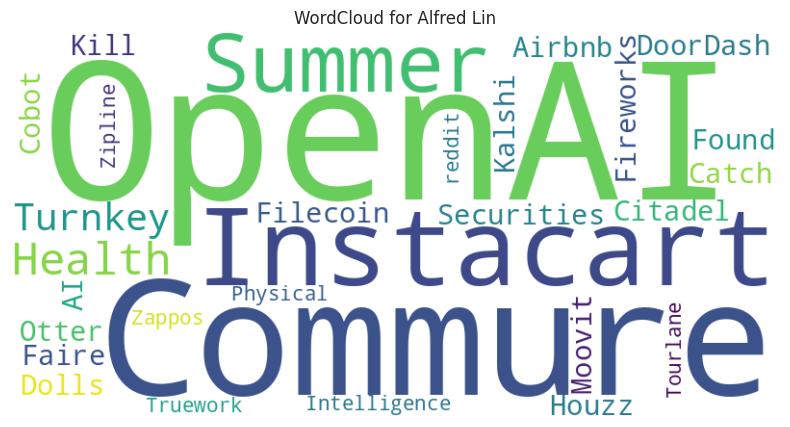

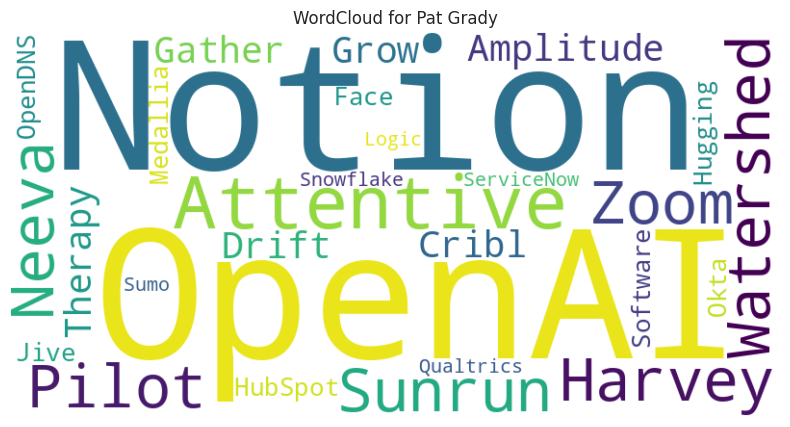

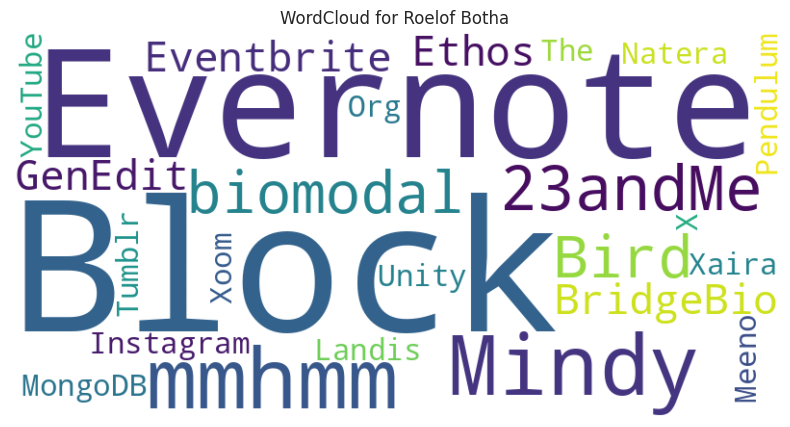

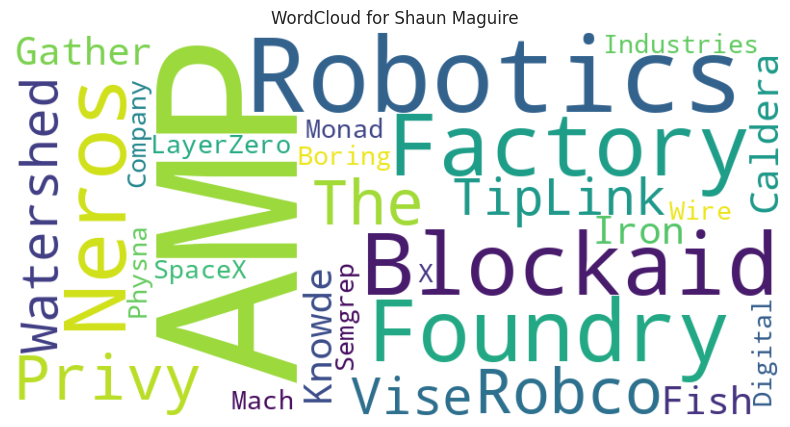

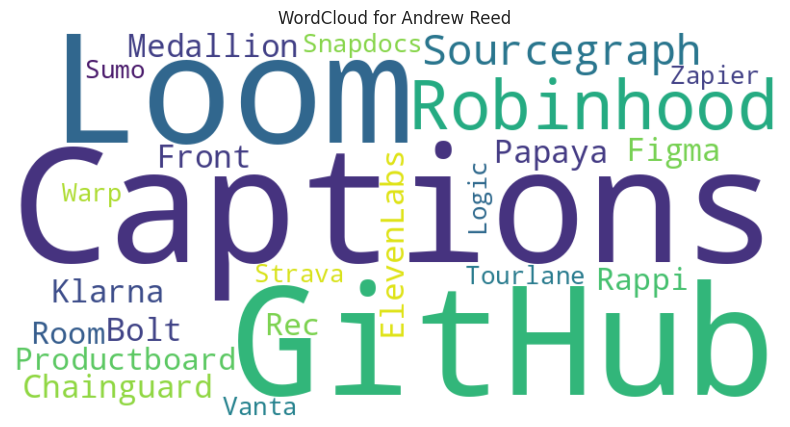

In [19]:
# Create a dictionary to store word counts for each partner
partner_word_counts = {}

# Iterate through the top 5 partners and their companies
for partner in top_5_partners:
  partner_companies = df_top_5_partners[df_top_5_partners.partners == partner]['company_name'].tolist()
  # Join the company names into a single string
  partner_company_string = ' '.join(partner_companies)
  # Count the words in the string and store them in the dictionary
  word_counts = {}
  for word in partner_company_string.split():
    word_counts[word] = word_counts.get(word, 0) + 1
  partner_word_counts[partner] = word_counts

# Generate word clouds for each partner
for partner, word_counts in partner_word_counts.items():
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title(f"WordCloud for {partner}")
  plt.show()

